In [195]:
import warnings
warnings.filterwarnings("ignore")

# Names

In [9]:
import names

names = nltk.corpus.names

names.fileids()
female_names = names.words("female.txt")
len(female_names)
#female_names

5001

In [10]:
total = male_names + female_names
len(total)

7944

In [18]:
"Vijay" in male_names

True

In [12]:
# create the logfile
import scraping_class
logfile = 'log_Exam.csv'## name your log file.
connector = scraping_class.Connector(logfile)

# Work with the movies start from here

In [2]:
import scraping_class
logfile = 'log.csv'## name your log file.
connector = scraping_class.Connector(logfile)

In [7]:
#Defining url, the call and parsing
from bs4 import BeautifulSoup
import requests
url = 'https://www.imdb.com/search/keyword/?ref_=kw_ref_typ&sort=moviemeter%2Casc&mode=detail&page=1&title_type=movie&fbclid=IwAR3AAeVD_whYi1AwPsSGdYsgH8FnupVrBhImRFD__GL3wdHegJwcxrUsfyc'
response,callid = connector.get(url,'Exam')
html = response.text
soup = BeautifulSoup(html,'lxml')

#Here we define what node we are looking at
h3_node = soup.find('h3') # find table node with specific attribute

h3_node





<h3 class="lister-item-header">
<span class="lister-item-index unbold text-primary">1.</span>
<a href="/title/tt7131622/">Once Upon a Time... in Hollywood</a>
<span class="lister-item-year text-muted unbold">(2019)</span>
</h3>

In [8]:
#This is used to extract the names of the movies

headline = soup.find('h3') # search for the first headline: h1 tag. 
name = headline['class'][0].strip() # use the class attribute name as column name.
value = headline.text.strip() # extract text using build in method.
#print(name,':',value)
value.split('\n')[1]

'Once Upon a Time... in Hollywood'

In [9]:
# scrape the title
movielist= []

for v in range(1, 100):
    url1 = 'https://www.imdb.com/search/keyword/?ref_=kw_ref_typ&sort=moviemeter%2Casc&mode=detail&page={}&title_type=movie&fbclid=IwAR3AAeVD_whYi1AwPsSGdYsgH8FnupVrBhImRFD__GL3wdHegJwcxrUsfyc'.format(v)
    call = 'Exam, KU{}'.format(v)
    response,callid = connector.get(url1, call)
    html = response.text
    soup = BeautifulSoup(html,'lxml')
    
    for i in range(50):
        headline_i = soup.findAll('h3')[i] # search for the first headline: h1 tag. 
        #name = headline_i['class'][0].strip() # use the class attribute name as column name.
        value = headline_i.text.strip() # extract text using build in method.
        film = value.split('\n')[1]
        movielist.append(film)
    
movielist

['Once Upon a Time... in Hollywood',
 'Scary Stories to Tell in the Dark',
 'Fast & Furious: Hobbs & Shaw',
 'Little Women',
 'Avengers: Endgame',
 'Løvernes konge',
 'Last Christmas',
 'Parasite',
 'Good Boys',
 'Aladdin',
 'Dora and the Lost City of Gold',
 'It del 2',
 'The Hunt',
 'Aquaman',
 'Godzilla II: King of the Monsters',
 'Dolemite Is My Name',
 'The Art of Racing in the Rain',
 'Spider-Man: Far from Home',
 'Brightburn',
 'The Peanut Butter Falcon',
 'The Kitchen',
 'Operation Brothers',
 'Nomis',
 'Alita: Battle Angel',
 'Joker',
 'Midsommar',
 'Ready or Not',
 '47 Meters Down: Uncaged',
 'Rocketman',
 'John Wick 3: Parabellum',
 'Shazam!',
 'Blinded by the Light',
 'Angry Birds 2 - Filmen',
 'Long Shot',
 'Spider-Man: Into the Spider-Verse',
 'The Hustle',
 'Thor: Love and Thunder',
 'Inglourious Basterds',
 'Pulp Fiction',
 'Toy Story 4',
 'Pokémon Detective Pikachu',
 'Angel Has Fallen',
 'Kæledyrenes hemmelige liv 2',
 'Annabelle Comes Home',
 "Where'd You Go, Bernade

In [36]:
# scrape the title
import re
directorlist= []

for v in range(1, 2):
    url1 = 'https://www.imdb.com/search/keyword/?ref_=kw_ref_typ&sort=moviemeter%2Casc&mode=detail&page={}&title_type=movie&fbclid=IwAR3AAeVD_whYi1AwPsSGdYsgH8FnupVrBhImRFD__GL3wdHegJwcxrUsfyc'.format(v)
    call = 'Exam, KU{}'.format(v)
    response,callid = connector.get(url1, call)
    html = response.text
    soup = BeautifulSoup(html,'lxml')
    
    for i in range(50):

        headline_i = soup.findAll("p", {"class":"text-muted text-small"})[i] # search for the first headline: h1 tag. 
        #headline_2 = headline_i.find("Director")             
        value = headline_i.text.strip()
        film = value.split('\n')
        directorlist.append(film)
    
str(directorlist[1]).split(",")[1]

str

In [25]:
import re
pattern = re.compile(r"\Director") 

string = "Director regex is awesome!"
result = pattern.match(string)
print(result.group()) # will print out 'r'

Director


In [30]:
# scrape the title
import re
directorlist= []
directorlist2= []

for v in range(1, 2):
    url1 = 'https://www.imdb.com/search/keyword/?ref_=kw_ref_typ&sort=moviemeter%2Casc&mode=detail&page={}&title_type=movie&fbclid=IwAR3AAeVD_whYi1AwPsSGdYsgH8FnupVrBhImRFD__GL3wdHegJwcxrUsfyc'.format(v)
    call = 'Exam, KU{}'.format(v)
    response,callid = connector.get(url1, call)
    html = response.text
    soup = BeautifulSoup(html,'lxml')
    
    for i in range(50):

        headline_i = soup.findAll("p", {"class":"text-muted text-small"})[i] # search for the first headline: h1 tag. 
        #headline_2 = headline_i.find("Director")             
        value = headline_i.text.strip()
        film = value.split('\n')
        directorlist.append(film)
        new = directorlist[i]
        new1 = new[1]
        directorlist2.append(new1)


for e in range(1,50,3):
    print(directorlist2[e])
    
#directorlist2[1]

Quentin Tarantino
André Øvredal
David Leitch
Greta Gerwig
530,610
87,881
|
|
|
|
|
Craig Zobel
285,497
69,241
|
|
|


# Dataset

In [228]:
import pandas as pd

df = pd.read_csv("/Users/moritzschneider/Documents/Uni/Copenhagen/Social Data Science/Git Group/Group-31-SoDa/Moritz/Exam/final files/movie.csv", index_col=0)
                 
df



,Title,Year,Genre,Rating,Gross,Director,Summary,Top Star,Star 2,Star 3,Star 4
0,En verden udenfor,1994,Drama,9.3,$28.34M,Frank Darabont,Two imprisoned men bond over a number of years...,"Tim Robbins,","Morgan Freeman,","Bob Gunton,",William Sadler
1,The Dark Knight,2008,"Action, Crime, Drama",9.0,$534.86M,Christopher Nolan,When the menace known as The Joker emerges fro...,"Christian Bale,","Heath Ledger,","Aaron Eckhart,",Michael Caine
2,Inception,2010,"Action, Adventure, Sci-Fi",8.8,$292.58M,Christopher Nolan,A thief who steals corporate secrets through t...,"Leonardo DiCaprio,","Joseph Gordon-Levitt,","Ellen Page,",Ken Watanabe
3,Fight Club,1999,Drama,8.8,$37.03M,David Fincher,An insomniac office worker and a devil-may-car...,"Brad Pitt,","Edward Norton,","Meat Loaf,",Zach Grenier
4,Pulp Fiction,1994,"Crime, Drama",8.9,$107.93M,Quentin Tarantino,"The lives of two mob hitmen, a boxer, a gangst...","John Travolta,","Uma Thurman,","Samuel L. Jackson,",Bruce Willis
5,Forrest Gump,1994,"Drama, Romance",8.8,$330.25M,Robert Zemeckis,"The presidencies of Kennedy and Johnson, the e...","Tom Hanks,","Robin Wright,","Gary Sinise,",Sally Field
6,The Matrix,1999,"Action, Sci-Fi",8.7,$171.48M,"['Lana Wachowski, ', 'Lilly Wachowski']",A computer hacker learns from mysterious rebel...,"Keanu Reeves,","Laurence Fishburne,","Carrie-Anne Moss,",Hugo Weaving
7,Ringenes herre: Eventyret om ringen,2001,"Adventure, Drama, Fantasy",8.8,$315.54M,Peter Jackson,A meek Hobbit from the Shire and eight compani...,"Elijah Wood,","Ian McKellen,","Orlando Bloom,",Sean Bean
8,Ringenes herre: Kongen vender tilbage,2003,"Adventure, Drama, Fantasy",8.9,$377.85M,Peter Jackson,Gandalf and Aragorn lead the World of Men agai...,"Elijah Wood,","Viggo Mortensen,","Ian McKellen,",Orlando Bloom
9,The Dark Knight Rises,2012,"Action, Thriller",8.4,$448.14M,Christopher Nolan,Eight years after the Joker's reign of anarchy...,"Christian Bale,","Tom Hardy,","Anne Hathaway,",Gary Oldman


In [229]:
#df["Director"]= df["Director"].str.split()
#df
#df["Director_first"]= df["Director"]
new = df["Director"].str.split(" ", n = 1, expand = True) 
df["Director First Name"]= new[0] 
df["Director Last Name"]= new[1]
df

,Title,Year,Genre,Rating,Gross,Director,Summary,Top Star,Star 2,Star 3,Star 4,Director First Name,Director Last Name
0,En verden udenfor,1994,Drama,9.3,$28.34M,Frank Darabont,Two imprisoned men bond over a number of years...,"Tim Robbins,","Morgan Freeman,","Bob Gunton,",William Sadler,Frank,Darabont
1,The Dark Knight,2008,"Action, Crime, Drama",9.0,$534.86M,Christopher Nolan,When the menace known as The Joker emerges fro...,"Christian Bale,","Heath Ledger,","Aaron Eckhart,",Michael Caine,Christopher,Nolan
2,Inception,2010,"Action, Adventure, Sci-Fi",8.8,$292.58M,Christopher Nolan,A thief who steals corporate secrets through t...,"Leonardo DiCaprio,","Joseph Gordon-Levitt,","Ellen Page,",Ken Watanabe,Christopher,Nolan
3,Fight Club,1999,Drama,8.8,$37.03M,David Fincher,An insomniac office worker and a devil-may-car...,"Brad Pitt,","Edward Norton,","Meat Loaf,",Zach Grenier,David,Fincher
4,Pulp Fiction,1994,"Crime, Drama",8.9,$107.93M,Quentin Tarantino,"The lives of two mob hitmen, a boxer, a gangst...","John Travolta,","Uma Thurman,","Samuel L. Jackson,",Bruce Willis,Quentin,Tarantino
5,Forrest Gump,1994,"Drama, Romance",8.8,$330.25M,Robert Zemeckis,"The presidencies of Kennedy and Johnson, the e...","Tom Hanks,","Robin Wright,","Gary Sinise,",Sally Field,Robert,Zemeckis
6,The Matrix,1999,"Action, Sci-Fi",8.7,$171.48M,"['Lana Wachowski, ', 'Lilly Wachowski']",A computer hacker learns from mysterious rebel...,"Keanu Reeves,","Laurence Fishburne,","Carrie-Anne Moss,",Hugo Weaving,['Lana,"Wachowski, ', 'Lilly Wachowski']"
7,Ringenes herre: Eventyret om ringen,2001,"Adventure, Drama, Fantasy",8.8,$315.54M,Peter Jackson,A meek Hobbit from the Shire and eight compani...,"Elijah Wood,","Ian McKellen,","Orlando Bloom,",Sean Bean,Peter,Jackson
8,Ringenes herre: Kongen vender tilbage,2003,"Adventure, Drama, Fantasy",8.9,$377.85M,Peter Jackson,Gandalf and Aragorn lead the World of Men agai...,"Elijah Wood,","Viggo Mortensen,","Ian McKellen,",Orlando Bloom,Peter,Jackson
9,The Dark Knight Rises,2012,"Action, Thriller",8.4,$448.14M,Christopher Nolan,Eight years after the Joker's reign of anarchy...,"Christian Bale,","Tom Hardy,","Anne Hathaway,",Gary Oldman,Christopher,Nolan


In [230]:
# get the male names list

import names
import nltk

names = nltk.corpus.names

names.fileids()
male_names = names.words("male.txt")
#len(male_names)
#male_names
#male_names = pd.DataFrame(male_names) convert it to dataframe

In [231]:
# check whether director first name in male list and add gender to director_gender
# then add director_gender values to new director gender df column
import numpy as np

director_gender = []

for e in df["Director First Name"]:
    if e in male_names:
        #print("male")
        director_gender.append("male")
        
    elif e in female_names:
        director_gender.append("female")
    else:
        #print("female")
        director_gender.append("neutral")
        
#director_gender

df["Director Gender"] = director_gender
df["Director Gender"]
df

,Title,Year,Genre,Rating,Gross,Director,Summary,Top Star,Star 2,Star 3,Star 4,Director First Name,Director Last Name,Director Gender
0,En verden udenfor,1994,Drama,9.3,$28.34M,Frank Darabont,Two imprisoned men bond over a number of years...,"Tim Robbins,","Morgan Freeman,","Bob Gunton,",William Sadler,Frank,Darabont,male
1,The Dark Knight,2008,"Action, Crime, Drama",9.0,$534.86M,Christopher Nolan,When the menace known as The Joker emerges fro...,"Christian Bale,","Heath Ledger,","Aaron Eckhart,",Michael Caine,Christopher,Nolan,male
2,Inception,2010,"Action, Adventure, Sci-Fi",8.8,$292.58M,Christopher Nolan,A thief who steals corporate secrets through t...,"Leonardo DiCaprio,","Joseph Gordon-Levitt,","Ellen Page,",Ken Watanabe,Christopher,Nolan,male
3,Fight Club,1999,Drama,8.8,$37.03M,David Fincher,An insomniac office worker and a devil-may-car...,"Brad Pitt,","Edward Norton,","Meat Loaf,",Zach Grenier,David,Fincher,male
4,Pulp Fiction,1994,"Crime, Drama",8.9,$107.93M,Quentin Tarantino,"The lives of two mob hitmen, a boxer, a gangst...","John Travolta,","Uma Thurman,","Samuel L. Jackson,",Bruce Willis,Quentin,Tarantino,male
5,Forrest Gump,1994,"Drama, Romance",8.8,$330.25M,Robert Zemeckis,"The presidencies of Kennedy and Johnson, the e...","Tom Hanks,","Robin Wright,","Gary Sinise,",Sally Field,Robert,Zemeckis,male
6,The Matrix,1999,"Action, Sci-Fi",8.7,$171.48M,"['Lana Wachowski, ', 'Lilly Wachowski']",A computer hacker learns from mysterious rebel...,"Keanu Reeves,","Laurence Fishburne,","Carrie-Anne Moss,",Hugo Weaving,['Lana,"Wachowski, ', 'Lilly Wachowski']",neutral
7,Ringenes herre: Eventyret om ringen,2001,"Adventure, Drama, Fantasy",8.8,$315.54M,Peter Jackson,A meek Hobbit from the Shire and eight compani...,"Elijah Wood,","Ian McKellen,","Orlando Bloom,",Sean Bean,Peter,Jackson,male
8,Ringenes herre: Kongen vender tilbage,2003,"Adventure, Drama, Fantasy",8.9,$377.85M,Peter Jackson,Gandalf and Aragorn lead the World of Men agai...,"Elijah Wood,","Viggo Mortensen,","Ian McKellen,",Orlando Bloom,Peter,Jackson,male
9,The Dark Knight Rises,2012,"Action, Thriller",8.4,$448.14M,Christopher Nolan,Eight years after the Joker's reign of anarchy...,"Christian Bale,","Tom Hardy,","Anne Hathaway,",Gary Oldman,Christopher,Nolan,male


# Data Cleaning

In [232]:
# clean Gross column
df["Gross"] = df["Gross"].str.replace("M","")
df["Gross"] = df["Gross"].str.replace("$","")
df = df.rename({"Gross": "Gross in M$"}, axis=1)
df

,Title,Year,Genre,Rating,Gross in M$,Director,Summary,Top Star,Star 2,Star 3,Star 4,Director First Name,Director Last Name,Director Gender
0,En verden udenfor,1994,Drama,9.3,28.34,Frank Darabont,Two imprisoned men bond over a number of years...,"Tim Robbins,","Morgan Freeman,","Bob Gunton,",William Sadler,Frank,Darabont,male
1,The Dark Knight,2008,"Action, Crime, Drama",9.0,534.86,Christopher Nolan,When the menace known as The Joker emerges fro...,"Christian Bale,","Heath Ledger,","Aaron Eckhart,",Michael Caine,Christopher,Nolan,male
2,Inception,2010,"Action, Adventure, Sci-Fi",8.8,292.58,Christopher Nolan,A thief who steals corporate secrets through t...,"Leonardo DiCaprio,","Joseph Gordon-Levitt,","Ellen Page,",Ken Watanabe,Christopher,Nolan,male
3,Fight Club,1999,Drama,8.8,37.03,David Fincher,An insomniac office worker and a devil-may-car...,"Brad Pitt,","Edward Norton,","Meat Loaf,",Zach Grenier,David,Fincher,male
4,Pulp Fiction,1994,"Crime, Drama",8.9,107.93,Quentin Tarantino,"The lives of two mob hitmen, a boxer, a gangst...","John Travolta,","Uma Thurman,","Samuel L. Jackson,",Bruce Willis,Quentin,Tarantino,male
5,Forrest Gump,1994,"Drama, Romance",8.8,330.25,Robert Zemeckis,"The presidencies of Kennedy and Johnson, the e...","Tom Hanks,","Robin Wright,","Gary Sinise,",Sally Field,Robert,Zemeckis,male
6,The Matrix,1999,"Action, Sci-Fi",8.7,171.48,"['Lana Wachowski, ', 'Lilly Wachowski']",A computer hacker learns from mysterious rebel...,"Keanu Reeves,","Laurence Fishburne,","Carrie-Anne Moss,",Hugo Weaving,['Lana,"Wachowski, ', 'Lilly Wachowski']",neutral
7,Ringenes herre: Eventyret om ringen,2001,"Adventure, Drama, Fantasy",8.8,315.54,Peter Jackson,A meek Hobbit from the Shire and eight compani...,"Elijah Wood,","Ian McKellen,","Orlando Bloom,",Sean Bean,Peter,Jackson,male
8,Ringenes herre: Kongen vender tilbage,2003,"Adventure, Drama, Fantasy",8.9,377.85,Peter Jackson,Gandalf and Aragorn lead the World of Men agai...,"Elijah Wood,","Viggo Mortensen,","Ian McKellen,",Orlando Bloom,Peter,Jackson,male
9,The Dark Knight Rises,2012,"Action, Thriller",8.4,448.14,Christopher Nolan,Eight years after the Joker's reign of anarchy...,"Christian Bale,","Tom Hardy,","Anne Hathaway,",Gary Oldman,Christopher,Nolan,male


In [233]:
# clean Top Star column
df["Top Star"] = df["Top Star"].str.replace(",", "")
df["Star 2"] = df["Star 2"].str.replace(",", "")
df["Star 3"] = df["Star 3"].str.replace(",", "")
df

,Title,Year,Genre,Rating,Gross in M$,Director,Summary,Top Star,Star 2,Star 3,Star 4,Director First Name,Director Last Name,Director Gender
0,En verden udenfor,1994,Drama,9.3,28.34,Frank Darabont,Two imprisoned men bond over a number of years...,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,Frank,Darabont,male
1,The Dark Knight,2008,"Action, Crime, Drama",9.0,534.86,Christopher Nolan,When the menace known as The Joker emerges fro...,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,Christopher,Nolan,male
2,Inception,2010,"Action, Adventure, Sci-Fi",8.8,292.58,Christopher Nolan,A thief who steals corporate secrets through t...,Leonardo DiCaprio,Joseph Gordon-Levitt,Ellen Page,Ken Watanabe,Christopher,Nolan,male
3,Fight Club,1999,Drama,8.8,37.03,David Fincher,An insomniac office worker and a devil-may-car...,Brad Pitt,Edward Norton,Meat Loaf,Zach Grenier,David,Fincher,male
4,Pulp Fiction,1994,"Crime, Drama",8.9,107.93,Quentin Tarantino,"The lives of two mob hitmen, a boxer, a gangst...",John Travolta,Uma Thurman,Samuel L. Jackson,Bruce Willis,Quentin,Tarantino,male
5,Forrest Gump,1994,"Drama, Romance",8.8,330.25,Robert Zemeckis,"The presidencies of Kennedy and Johnson, the e...",Tom Hanks,Robin Wright,Gary Sinise,Sally Field,Robert,Zemeckis,male
6,The Matrix,1999,"Action, Sci-Fi",8.7,171.48,"['Lana Wachowski, ', 'Lilly Wachowski']",A computer hacker learns from mysterious rebel...,Keanu Reeves,Laurence Fishburne,Carrie-Anne Moss,Hugo Weaving,['Lana,"Wachowski, ', 'Lilly Wachowski']",neutral
7,Ringenes herre: Eventyret om ringen,2001,"Adventure, Drama, Fantasy",8.8,315.54,Peter Jackson,A meek Hobbit from the Shire and eight compani...,Elijah Wood,Ian McKellen,Orlando Bloom,Sean Bean,Peter,Jackson,male
8,Ringenes herre: Kongen vender tilbage,2003,"Adventure, Drama, Fantasy",8.9,377.85,Peter Jackson,Gandalf and Aragorn lead the World of Men agai...,Elijah Wood,Viggo Mortensen,Ian McKellen,Orlando Bloom,Peter,Jackson,male
9,The Dark Knight Rises,2012,"Action, Thriller",8.4,448.14,Christopher Nolan,Eight years after the Joker's reign of anarchy...,Christian Bale,Tom Hardy,Anne Hathaway,Gary Oldman,Christopher,Nolan,male


In [234]:
# convert string values in Gross to float
df["Gross in M$"] = df["Gross in M$"].convert_objects(convert_numeric=True)

In [252]:
# split Genre column

df["Genre"] = pd.Series(df["Genre"])
type(df["Genre"])
new1 = df["Genre"].str.split(",", expand=True)
df["Genre 1"]= new1[0] 
df["Genre 2"]= new1[1]
df["Genre 3"]= new1[2]
df

,Title,Year,Genre,Rating,Gross in M$,Director,Summary,Top Star,Star 2,Star 3,Star 4,Director First Name,Director Last Name,Director Gender,Genre 1,Genre 2,Genre 3
0,En verden udenfor,1994,Drama,9.3,28.34,Frank Darabont,Two imprisoned men bond over a number of years...,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,Frank,Darabont,male,Drama,None,None
1,The Dark Knight,2008,"Action, Crime, Drama",9.0,534.86,Christopher Nolan,When the menace known as The Joker emerges fro...,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,Christopher,Nolan,male,Action,Crime,Drama
2,Inception,2010,"Action, Adventure, Sci-Fi",8.8,292.58,Christopher Nolan,A thief who steals corporate secrets through t...,Leonardo DiCaprio,Joseph Gordon-Levitt,Ellen Page,Ken Watanabe,Christopher,Nolan,male,Action,Adventure,Sci-Fi
3,Fight Club,1999,Drama,8.8,37.03,David Fincher,An insomniac office worker and a devil-may-car...,Brad Pitt,Edward Norton,Meat Loaf,Zach Grenier,David,Fincher,male,Drama,None,None
4,Pulp Fiction,1994,"Crime, Drama",8.9,107.93,Quentin Tarantino,"The lives of two mob hitmen, a boxer, a gangst...",John Travolta,Uma Thurman,Samuel L. Jackson,Bruce Willis,Quentin,Tarantino,male,Crime,Drama,None
5,Forrest Gump,1994,"Drama, Romance",8.8,330.25,Robert Zemeckis,"The presidencies of Kennedy and Johnson, the e...",Tom Hanks,Robin Wright,Gary Sinise,Sally Field,Robert,Zemeckis,male,Drama,Romance,None
6,The Matrix,1999,"Action, Sci-Fi",8.7,171.48,"['Lana Wachowski, ', 'Lilly Wachowski']",A computer hacker learns from mysterious rebel...,Keanu Reeves,Laurence Fishburne,Carrie-Anne Moss,Hugo Weaving,['Lana,"Wachowski, ', 'Lilly Wachowski']",neutral,Action,Sci-Fi,None
7,Ringenes herre: Eventyret om ringen,2001,"Adventure, Drama, Fantasy",8.8,315.54,Peter Jackson,A meek Hobbit from the Shire and eight compani...,Elijah Wood,Ian McKellen,Orlando Bloom,Sean Bean,Peter,Jackson,male,Adventure,Drama,Fantasy
8,Ringenes herre: Kongen vender tilbage,2003,"Adventure, Drama, Fantasy",8.9,377.85,Peter Jackson,Gandalf and Aragorn lead the World of Men agai...,Elijah Wood,Viggo Mortensen,Ian McKellen,Orlando Bloom,Peter,Jackson,male,Adventure,Drama,Fantasy
9,The Dark Knight Rises,2012,"Action, Thriller",8.4,448.14,Christopher Nolan,Eight years after the Joker's reign of anarchy...,Christian Bale,Tom Hardy,Anne Hathaway,Gary Oldman,Christopher,Nolan,male,Action,Thriller,None


# Descriptive Statistics & Analysis

## Mean, Max, Min

In [214]:
print("Max Year:", df["Year"].max())
print("Min Year:", df["Year"].min())

Max Year: 2019
Min Year: 1980


In [206]:
print("Rating Mean:", df["Rating"].mean())
print("Rating Max:", df["Rating"].max())
print("Rating Min:", df["Rating"].min())

Rating Mean: 6.489629999999969
Rating Max: 9.3
Rating Min: 1.0


In [209]:
# mean of Gross in M$
print("Gross $M Mean:", df["Gross in M$"].mean())
print("Gross $M Max:", df["Gross in M$"].max())
print("Gross $M Min:", df["Gross in M$"].min())

Gross $M Mean: 35.079317472699
Gross $M Max: 936.66
Gross $M Min: 0.0


In [16]:
# count the values of gender in column
df["Director Gender"].value_counts()

male       6794
neutral    2740
female      466
Name: Director Gender, dtype: int64

## Correlation Matrix

In [215]:
corr = df.corr()
corr

,Year,Rating,Gross in M$
Year,1.000000,-0.074179,0.054050
Rating,-0.074179,1.000000,0.112385
Gross in M$,0.054050,0.112385,1.000000


## Plots

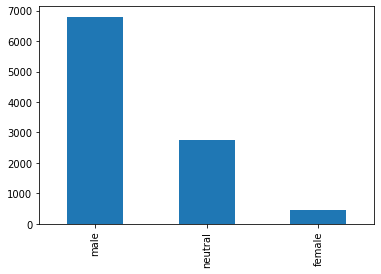

In [17]:
# plot of males and females as director
import matplotlib.pyplot as plt
%matplotlib inline
df["Director Gender"].value_counts().T.plot(kind='bar')
plt.show()

In [202]:
# count of nas in column
df["Gross"].isna().sum()

2308

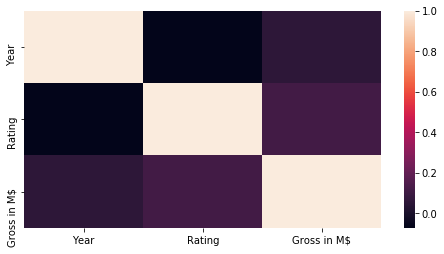

In [216]:
import seaborn as sns

plt.figure(figsize=(8,4))
ax = sns.heatmap(df.corr())
#ax = df.pivot("Year", "Director Gender")
#df["Director Gender"]

# Star Names List

In [125]:
# load the text document
f = open("/Users/moritzschneider/Documents/Uni/Copenhagen/Social Data Science/Git Group/Group-31-SoDa/Data/female_name.txt", "r")
f

<_io.TextIOWrapper name='/Users/moritzschneider/Documents/Uni/Copenhagen/Social Data Science/Git Group/Group-31-SoDa/Data/female_name.txt' mode='r' encoding='UTF-8'>

In [160]:
# print the text file to get a first impression of its looks

#for line in f:
#    print(line)

## Star Name List Preparation

In [217]:
line.split(",")

["['Natalie Portman'",
 " 'Anne Hathaway'",
 " 'Talia Shire'",
 " 'Diane Keaton'",
 " 'Keira Knightley'",
 " 'Uma Thurman'",
 " 'Jennifer Lawrence'",
 " 'Julianne Moore'",
 " 'Amy Adams'",
 " 'Cate Blanchett'",
 " 'Marion Cotillard'",
 " 'Helena Bonham Carter'",
 " 'Jessica Chastain'",
 " 'Kate Winslet'",
 " 'Scarlett Johansson'",
 " 'Léa Seydoux'",
 " 'Robin Wright'",
 " 'Vera Farmiga'",
 " 'Tilda Swinton'",
 " 'Gwyneth Paltrow'",
 " 'Carrie-Anne Moss'",
 " 'Maggie Gyllenhaal'",
 " 'Jennifer Connelly'",
 " 'Judi Dench'",
 " 'Jodie Foster'",
 " 'Meryl Streep'",
 " 'Carrie Fisher'",
 " 'Amanda Plummer'",
 " 'Sigourney Weaver'",
 " 'Frances McDormand'",
 " 'Sandra Bullock'",
 " 'Rebecca Hall'",
 " 'Sally Field'",
 " 'Daryl Hannah'",
 " 'Juno Temple'",
 " 'Naomie Harris'",
 " 'Julia Roberts'",
 " 'Emily Mortimer'",
 " 'Naomi Watts'",
 " 'Nicole Kidman'",
 " 'Emma Stone'",
 " 'Jennifer Garner'",
 " 'Michelle Williams'",
 " 'Carey Mulligan'",
 " 'Mélanie Laurent'",
 " 'Melissa Leo'",
 " 'Ka

In [159]:
Liste = line.split(",")
Liste

s = pd.Series(Liste)
s = s.str.replace("[","")
s = s.str.replace("]","")
s = s.str.replace("\n","")
s = s.str.replace("'","")
df2 = pd.DataFrame(s)
df2.head()

,0
0,Natalie Portman
1,Anne Hathaway
2,Talia Shire
3,Diane Keaton
4,Keira Knightley
